In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
from keras.utils import to_categorical


Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)
Total number of outputs: 10
Output classes [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth :[3]')

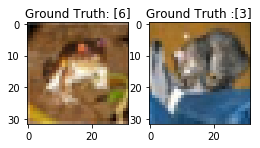

In [4]:
print('Training data shape:', train_images.shape, train_labels.shape)
print('Testing data shape:', test_images.shape, test_labels.shape)

classes =np.unique(train_labels)
nClasses =len(classes)
print('Total number of outputs:', nClasses)
print('Output classes', classes)

plt.figure(figsize =[4,2])

plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap ='gray')
plt.title('Ground Truth: {}'.format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title('Ground Truth :{}'.format(test_labels[0]))

In [8]:
# preprocess the data
nRows, nCols, nDims =train_images.shape[1:]
train_data =train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data =test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape=(nRows, nCols, nDims)
# change to float datatype
train_data =train_data.astype('float32')
test_data =test_data.astype('float32')

train_data /=255
test_data /= 255

train_labels_one_hot =to_categorical(train_labels)
test_labels_one_hot =to_categorical(test_labels)


In [9]:
print('Original label 0:', train_labels[0])
print('After conversion to categorical(one hot) :', train_labels_one_hot[0])


Original label 0: [6]
After conversion to categorical(one hot) : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [11]:
model1 =createModel()
batch_size =256
epochs =50


In [13]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()
history =model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))

model1.evaluate(test_data, test_labels_one_hot)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

50000/50000 [==============================] - 127s 3ms/step - loss: 0.4810 - acc: 0.8346 - val_loss: 0.6288 - val_acc: 0.7961
Epoch 43/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4812 - acc: 0.8340 - val_loss: 0.6265 - val_acc: 0.8039
Epoch 44/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4792 - acc: 0.8351 - val_loss: 0.6654 - val_acc: 0.7989
Epoch 45/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4693 - acc: 0.8376 - val_loss: 0.7175 - val_acc: 0.7864
Epoch 46/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4680 - acc: 0.8387 - val_loss: 0.6668 - val_acc: 0.7850
Epoch 47/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4672 - acc: 0.8390 - val_loss: 0.6601 - val_acc: 0.7964
Epoch 48/50
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4683 - acc: 0.8395 - val_loss: 0.6121 - val_acc: 0.7986
Epoch 49/50
50000/50000 [==============

[0.6021983637094498, 0.8094]

Text(0.5,1,'Loss Curves')

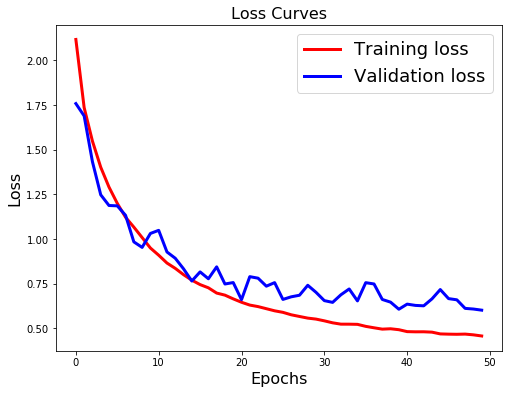

In [16]:
plt.figure(figsize =[8,6])
plt.plot(history.history['loss'],'r', linewidth =3.0)
plt.plot(history.history['val_loss'],'b', linewidth =3.0)
plt.legend(['Training loss', 'Validation loss'], fontsize=18)
plt.xlabel('Epochs', fontsize =16)
plt.ylabel('Loss', fontsize =16)
plt.title('Loss Curves', fontsize=16)

Text(0.5,1,'Accuracy Curves')

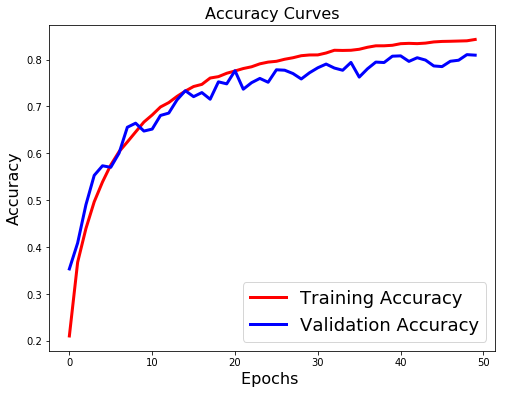

In [17]:
plt.figure(figsize =[8,6])
plt.plot(history.history['acc'],'r', linewidth =3.0)
plt.plot(history.history['val_acc'], 'b', linewidth =3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize =18)
plt.xlabel('Epochs ',fontsize =16)
plt.ylabel('Accuracy', fontsize =16)
plt.title('Accuracy Curves', fontsize =16)


In [18]:
# training using data augmentation

from keras.preprocessing.image import ImageDataGenerator
model2 = createModel()



In [21]:
model2.compile(optimizer='rmsprop', loss= 'categorical_crossentropy',
               metrics=['accuracy'])

batch_size =256
epochs =50
datagen =ImageDataGenerator( width_shift_range=0.1, height_shift_range=0.1,
                           horizontal_flip=True, vertical_flip=False)
#datagen.fit(train_data)
steps_per_epoch =int(np.ceil(train_data.shape[0]/float(batch_size)))
history2 =model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, 
                                            batch_size=batch_size),
                               steps_per_epoch=steps_per_epoch, epochs=epochs,
                              validation_data =(test_data, test_labels_one_hot),
                              workers =4)
model2.evaluate(test_data, test_labels_one_hot)


Epoch 1/50
196/196 [==============================] - 128s 654ms/step - loss: 2.0723 - acc: 0.2388 - val_loss: 1.7012 - val_acc: 0.3830
Epoch 2/50
196/196 [==============================] - 127s 650ms/step - loss: 1.7702 - acc: 0.3561 - val_loss: 1.5929 - val_acc: 0.4036
Epoch 3/50
196/196 [==============================] - 127s 650ms/step - loss: 1.6049 - acc: 0.4157 - val_loss: 1.3455 - val_acc: 0.5160
Epoch 4/50
196/196 [==============================] - 127s 650ms/step - loss: 1.4870 - acc: 0.4663 - val_loss: 1.2961 - val_acc: 0.5295
Epoch 5/50
196/196 [==============================] - 130s 663ms/step - loss: 1.3938 - acc: 0.4998 - val_loss: 1.2501 - val_acc: 0.5566
Epoch 6/50
196/196 [==============================] - 127s 648ms/step - loss: 1.3197 - acc: 0.5305 - val_loss: 1.1389 - val_acc: 0.5945
Epoch 7/50
196/196 [==============================] - 126s 642ms/step - loss: 1.2647 - acc: 0.5495 - val_loss: 1.1184 - val_acc: 0.5938
Epoch 8/50
196/196 [============================

[0.5969045619726181, 0.8033]

Text(0.5,1,'Loss Curves')

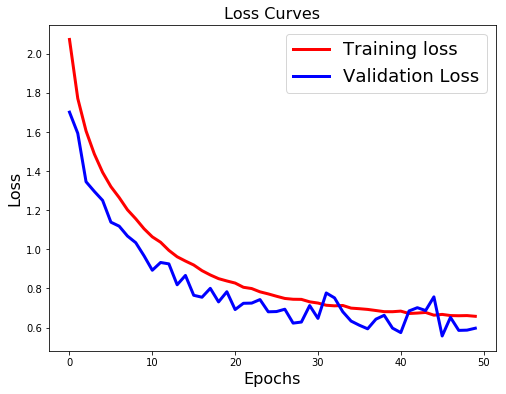

In [22]:
plt.figure(figsize =[8,6])
plt.plot(history2.history['loss'], 'r',linewidth =3.0)
plt.plot(history2.history['val_loss'],'b', linewidth =3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize =18)
plt.xlabel('Epochs', fontsize =16)
plt.ylabel('Loss', fontsize =16)
plt.title('Loss Curves', fontsize =16)


Text(0.5,1,'Accuracy Curves')

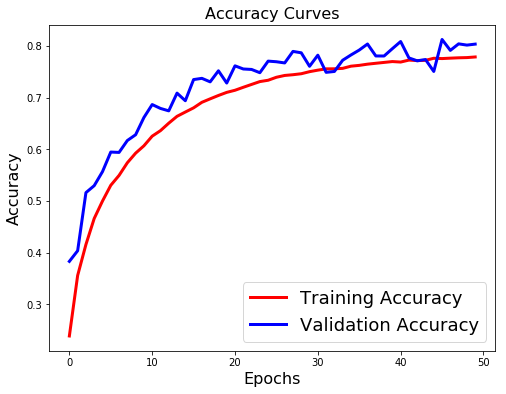

In [23]:
plt.figure(figsize =[8,6])
plt.plot(history2.history['acc'],'r', linewidth =3.0)
plt.plot(history2.history['val_acc'], 'b', linewidth =3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize =18)
plt.xlabel('Epochs', fontsize =16)
plt.ylabel('Accuracy', fontsize =16)
plt.title('Accuracy Curves', fontsize =16)